<a href="https://colab.research.google.com/github/gus474/Biosystem-Engineering-Supervised-Learning-II/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Data prepared for model training and evaluation
- Loaded Cherry spectral dataset as a Pandas DataFrame and assigning it to the variable name `df_cherry_spectral`
- Extracted only `Bing` variety rows and overwriting `df_cherry_spectral`
- Randomly shuffled `df_cherry_spectral` using the `.sample(frac=1, random_state=0)` method (this is needed for to avoid any sequential patterns along rows)
- Split `df_cherry_spectral` into train and test dataframes called `df_cherry_spectral_train` and `df_cherry_spectral_test`, respectively. Since I already shuffled the rows above I can just use dataframe indexing. I put the first 50 rows into `df_cherry_spectral_test` and the remaining rows into `df_cherry_spectral_train`.
- Created the `X_train`, `X_test`, `y_train`, and `y_test`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load libraries and modules
import pandas as pd
import numpy as np

# Read csv file into dataframe
df_cherry_spectral = pd.read_table('/content/drive/MyDrive/cherry_data_spectral.csv', sep=',', index_col='fruit_id')

# Extract 'Bing' variety only
df_cherry_spectral = df_cherry_spectral[df_cherry_spectral['variety'] == 'Bing']

# Shuffle rows
df_cherry_spectral = df_cherry_spectral.sample(frac=1, random_state=0)

# Train/test split
df_cherry_spectral_train = df_cherry_spectral[50:]
df_cherry_spectral_test = df_cherry_spectral[0:50]

# Split the train and test data into X and y
X_train = df_cherry_spectral_train.drop(columns=['variety', 'dry_matter_ratio'])
X_test = df_cherry_spectral_test.drop(columns=['variety', 'dry_matter_ratio'])
y_train = df_cherry_spectral_train['dry_matter_ratio']
y_test = df_cherry_spectral_test['dry_matter_ratio']

#### I defined a model evaluation function to use in the questions below
- The function is called `evaluate_model`
- The function takes the following input arguments:
 - `y_train`: Known $y$ output for train set
 - `y_test`: Known $y$ output for test set
 - `y_train_pred`: Model predictions of $y$ based on `x_train` for train set
 - `y_test_pred`: Model predictions of $y$ based on `x_test` for test set
- The function returns a tuple of 6 values containing the following outputs:
 - `mean_squared_error_train`
 - `mean_squared_error_test`
 - `mean_absolute_error_train`
 - `mean_absolute_error_test`
 - `r2_train`
 - `r2_test`
- The function uses other functions from the `sklearn.metrics` module to generate these six outputs.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:


def evaluate_model(y_train, y_test, y_train_pred, y_test_pred ):
  mean_squared_error_train = mean_squared_error(y_train, y_train_pred, squared = False) #Defining the RMSE metric.
  mean_squared_error_test = mean_squared_error(y_test, y_test_pred, squared = False)
  mean_absolute_error_train = mean_absolute_error(y_train, y_train_pred) #MAE metric.
  mean_absolute_error_test = mean_absolute_error(y_test, y_test_pred)
  r2_train = r2_score(y_train, y_train_pred) #R_squared metric.
  r2_test = r2_score(y_test, y_test_pred)

  return(mean_squared_error_train,  mean_squared_error_test, mean_absolute_error_train, mean_absolute_error_test, r2_train, r2_test)


#### Single variable linear model based on best Pearson's r value
- Similar to previous analyses, I'm using the spectral band with the highest absolute Pearson's r value in the `Bing` variety to fit a linear model.
- I then predict `y_pred_train` and `y_pred_test` using this model.
- Then evaluate the model on the train and test sets using the `evaluate_model()` function.

In [ ]:
#df_cherry_spectral['abs_828']

In [ ]:
corr_matrix_bing = df_cherry_spectral.corr() #Assigning a correlation matrix.
corr_matrix_bing = corr_matrix_bing.sort_values(by = 'dry_matter_ratio', ascending = False) #Sorting the values from most closely correlated with dry_matter_ratio to least (in terms of spectra).
corr_matrix_bing = corr_matrix_bing.abs() #Because we could have negative correlations.
#corr_matrix_bing
corr_matrix_bing = corr_matrix_bing.drop(labels = 'dry_matter_ratio')
X_pearson_r = corr_matrix_bing['dry_matter_ratio'].index #Indexing the values so we can retreive the names.
#X_pearson_r[0:3]
#corr_matrix_bing = corr_matrix_bing[corr_matrix_bing != 1]
##best_var = corr_matrix_bing.idxmax()
#best_var
#one_best_var = best_var[0]
#one_best_var
#X_pearson_r
#df_cherry_spectral
X_pearson_r

'abs_828'

In [ ]:
from sklearn import linear_model
lm = linear_model.LinearRegression() #Calling the Linear regression function.
#X1n = X_train['abs_828'][np.newaxis, :].reshape(-1,1)
#X1t = X_test['abs_828'][np.newaxis, :].reshape(-1,1)
#y_train[np.newaxis, :].reshape(-1,1)
#X_train = X_train[best_var]#[np.newaxis, :]
X1n = np.array(X_train[X_pearson_r[0]]).reshape(-1, 1)
X1t = np.array(X_test[X_pearson_r[0]]).reshape(-1, 1)
lm.fit(X1n, y_train)
y_train_pred = lm.predict(X1n) #predicting the model on the training data.
lm.fit(X1t, y_test)
y_test_pred = lm.predict(X1t) #predicting the model on test data.
evaluate_model(y_train, y_test, y_train_pred, y_test_pred) #Scores of the models.
#y_test_pred = mstrain.
#X_train.shape
#y_train.shape
#X1.shape

(0.062271701499586295,
 0.06768115965206888,
 0.04796231901680013,
 0.054404042171081926,
 0.6564652108188405,
 0.679083117203998)

#### Three variable linear model based on best Pearson's r value
- Using the three spectral bands with the highest absolute Pearson's r values in the `Bing` variety I fit a multivariate linear model.
- Again predict `y_pred_train` and `y_pred_test` using this model.
- Then evaluate the model on the train and test sets using the `evaluate_model()` function that we created above.

In [ ]:


X1n = np.array(X_train[X_pearson_r[0:3]]) #Taking the first three variables most closely correlated with dry_matter_ratio
X1t = np.array(X_test[X_pearson_r[0:3]])
y_train = np.array(y_train)
#X1t.shape
#X = np.array(df_boston_housing.drop(columns='MEDV'))
#y = np.array(df_boston_housing['MEDV'])
lm.fit(X1n, y_train)
y_train_pred = lm.predict(X1n) #Predciting
lm.fit(X1t, y_test)
y_test_pred = lm.predict(X1t)
evaluate_model(y_train, y_test, y_train_pred, y_test_pred)

(0.05772328017811417,
 0.06350022266339034,
 0.044560363271413814,
 0.048728975897691394,
 0.7048170534755367,
 0.7175071379108322)

#### I've iteratively trained 263 linear models, each of which includes one additional spectral variable as an input
- The initial model includes 1 spectral variable, whereas the final model will have all 263 spectral variable
- The spectral variables are introduced from strongest to weakest absolute correlation based on Pearson's r
- I used 10-fold cross-validation to calculate the mean RMSE value on the train set for each iteration and appended each RMSE value to a list called `rmse_val_imax_r_list`
- After plotting the resulting RMSE (y-axis) vs. number of spectral variables in the model (x-axis), I've include a red vertical line that shows the number of spectral variables at which the model with a minimum RMSE occurs. This is the best model found on the training set via 10-fold cross validation. I've printed this value on the plot as well.
- Predicted `y_pred_train` and `y_pred_test` using this best model that corresponds with the minimum RMSE value.
- Evaluated the model on the train and test sets using the `evaluate_model()` function.

In [ ]:
y = df_cherry_spectral['dry_matter_ratio']
X =df_cherry_spectral.drop(columns= ['variety', 'dry_matter_ratio'])
X[X_pearson_r[0:1]] #Checking to make sure that the model pulls the most cloesly related features for the entire dataset.


(210, 263)

In [ ]:
rmse_val_imax_r_list = []
from sklearn.model_selection import cross_val_score
y = np.array(df_cherry_spectral['dry_matter_ratio'])#.reshape(-1,1)
X = df_cherry_spectral.drop(columns= ['variety', 'dry_matter_ratio'])
#i = 0
for i in range(1,263):
  X_number = X[X_pearson_r[0:i]]
  rmse_cv = -cross_val_score(lm, X_number, y, scoring='neg_root_mean_squared_error', cv=10) #Cross validation function that trains on 9 of the data folds, and tests on the kth fold.
  rmse_val_imax_r_list.append(rmse_cv.mean())

  #X_number_train = np.array(X_train[X_number])#.reshape(-1, 1)#'abs_828'
  #X_number_test = np.array(X_test[X_number])
  #lm.fit(X_number_train, y_train)
  #y_train_pred = lm.predict(X_number_train) #np.array(X1).reshape(-1, 1)
  #lm.fit(X_number_test, y_test)
  #y_test_pred = lm.predict(X_number_test)
  #evaluate_model(y_train, y_test, y_train_pred, y_test_pred)


In [ ]:
#a = rmse_val_imax_r_list
#a = a.sort()
min_val = min(rmse_val_imax_r_list) #Finding the minimum magnitude of the list.
min_val_index = rmse_val_imax_r_list.index(min_val) #Finding the index of that minimum magnitude value. (Since the model is forward stepwise selection-like, thus, we know that the index of the model is the number of features.)
min_val_index
#rmse_val_imax_r_list[rmse_val_imax_r_list == 0.057604808891267845]
#rmse_val_imax_r_list
#rmse_val_imax_r_list[rmse_val_imax_r_list == a[0]]
#rmse_val_imax_r_list ==  a[0]


6

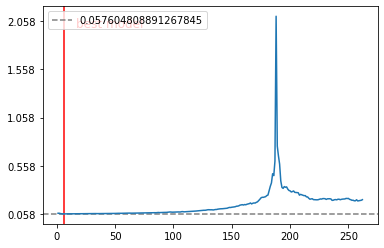

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker
x = range(1,263)

plt.axvline(x = 6, color = 'r') #Plotting best feature line.
#plt.axvline(y = min_val_index, linest)
#plt.axhline(y=0.5, color='r', linestyle='--', label='label')


plt.axhline(y= min_val, xmin = 0, xmax = 6, linestyle = '--', label = str(min_val), color = 'gray') #Plotting minimum RMSE value line (~0.0576)
plt.legend()
plt.text(min_val_index + 10, 2, s = 'best model', size=12, color='r') #displaying the value since I couldn't figure out how to show more numbers in the yticks.
plt.yticks(np.arange(0,3,.5) + min_val)
plt.plot(x, rmse_val_imax_r_list)


In [ ]:
nX_train = np.array(X_train[X_pearson_r[0:min_val_index]]) #Taking the minimum RMSE model features.
nX_test = np.array(X_test[X_pearson_r[0:min_val_index]])
lm = linear_model.LinearRegression()
lm.fit(nX_train, y_train) #Training our minimum RMSE model
y_train_pred = lm.predict(nX_train)
lm.fit(nX_test, y_test)
y_test_pred = lm.predict(nX_test) #Predicting that model on testing data.
evaluate_model(y_train, y_test, y_train_pred, y_test_pred) #Scoring metrics.


(0.05513389952186275,
 0.056677769587482704,
 0.042603103288665636,
 0.043617659279760516,
 0.7307059983841883,
 0.7749482029787231)

#### Defined a function for standardizing a 2d array called `standardize_arr()`. For each column in $\textbf{X}$ dataframes this function:
 (1) Subtracts the mean of the values in that column

 (2) Divides by the standard deviation of the values in that column returning a standardized array.


In [ ]:
def standardize_arr(x):
  x_mean = x.mean(axis = 0)
  x_sd = x.std(axis = 0)
  Xnew = (x - x_mean)/x_sd
  return Xnew
#X = np.array(X)
#standardize_arr(X)
#X.std(axis = 0)
#X_mean = X.mean(axis=0)
#X_sd = X.std(axis = 0)
#standaredize_arr = (X - X_mean)/X_sd
#standaredize_arr

#### Recursive Feature Elimination using Cross-Validation (RFECV) for feature selection
- Standardized `X_train`
- Used RFECV with 10-fold cross validation that is scored using RMSE
- Fitted a model to the training data using RFECV
- Ploted the resulting RMSE (y-axis) vs. number of spectral variables in the model (x-axis). Included a red vertical line that shows the number of spectral variables which the RFECV algorithm recommends keeping. This is the best model found on the training set via 10-fold cross validation.
- Predicted `y_pred_train` and `y_pred_test` using this best model & evaluate the model on the train and test sets using the `evaluate_model()` function.

In [ ]:
from sklearn.feature_selection import RFECV

lm = linear_model.LinearRegression()
stanX_train = standardize_arr(X_train)
feature_selector = RFECV(lm, cv = 10, scoring= 'neg_root_mean_squared_error')
feature_selector = feature_selector.fit(stanX_train, y_train) #Recursively finding best model in a backward stepwise selection manner.



In [ ]:
from sklearn.model_selection import cross_val_score

best_rfecv_model = np.where(feature_selector.ranking_ == 1)[0]
best_rfecv_model
#The RFECV model has 11 features which are shown below.

array([130, 139, 143, 149, 150, 151, 152, 158, 159, 160, 161])

In [ ]:
#The names of the features chosen in our RFECV model.
names = X_train.columns[best_rfecv_model]
names

Index(['abs_741', 'abs_768', 'abs_780', 'abs_798', 'abs_801', 'abs_804',
       'abs_807', 'abs_825', 'abs_828', 'abs_831', 'abs_834'],
      dtype='object')

In [ ]:
X_train[names]

,abs_741,abs_768,abs_780,abs_798,abs_801,abs_804,abs_807,abs_825,abs_828,abs_831,abs_834
fruit_id,,,,,,,,,,,
628,-0.30250,-0.39498,-0.42471,-0.46089,-0.46570,-0.47016,-0.47421,-0.48906,-0.48918,-0.48903,-0.48900
759,-0.37502,-0.43328,-0.45277,-0.47725,-0.48049,-0.48346,-0.48603,-0.49286,-0.49175,-0.49033,-0.48904
874,-0.47743,-0.50121,-0.51282,-0.53018,-0.53257,-0.53473,-0.53655,-0.53852,-0.53637,-0.53392,-0.53175
906,-0.42846,-0.45267,-0.46410,-0.48103,-0.48334,-0.48547,-0.48721,-0.48915,-0.48711,-0.48481,-0.48276
610,-0.42274,-0.45941,-0.47381,-0.49355,-0.49625,-0.49871,-0.50086,-0.50605,-0.50481,-0.50332,-0.50204
...,...,...,...,...,...,...,...,...,...,...,...
725,-0.36221,-0.42978,-0.45193,-0.47966,-0.48334,-0.48672,-0.48971,-0.49868,-0.49778,-0.49662,-0.49561
900,-0.44333,-0.46595,-0.47835,-0.49724,-0.49984,-0.50220,-0.50418,-0.50594,-0.50340,-0.50049,-0.49786
800,-0.47707,-0.48855,-0.49766,-0.51280,-0.51498,-0.51697,-0.51862,-0.52025,-0.51814,-0.51575,-0.51357


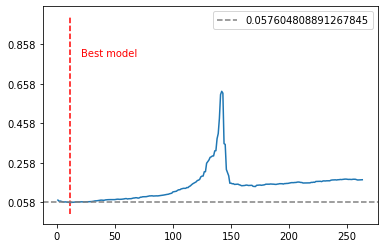

In [ ]:


plt.plot(range(1, feature_selector.grid_scores_.shape[0] + 1), -feature_selector.grid_scores_)

plt.vlines(x=feature_selector.n_features_, ymin=0, ymax=1, linestyles='dashed', colors='r') #Best model feature point.
plt.text(x = 11 + 10, y = 0.8, s = 'Best model', color = 'r')
plt.axhline(y= -feature_selector.grid_scores_[10], xmin = 0, xmax = 300, linestyle = '--', label = str(min_val), color = 'gray')
plt.yticks(np.arange(0,1,.2) + -feature_selector.grid_scores_[10]) #Adding a ytick at the minimum RMSE value (~0.0576)
plt.legend()

In [ ]:
nX_train = np.array(X_train[names])
nX_test = np.array(X_test[names])
lm.fit(nX_train, y_train)
y_train_pred = lm.predict(nX_train)
lm.fit(nX_test, y_test)
y_test_pred = lm.predict(nX_test)
evaluate_model(y_train, y_test, y_train_pred, y_test_pred)


(0.05332411224038054,
 0.05555443934168409,
 0.04118230544876359,
 0.043004273817173574,
 0.748095151418624,
 0.783780668394366)

#### 1.h. Created a Pandas DataFrame which summarizes the results of all the tests conducted.
- Provided my interpretation of the results, including a which model I consider to be the best in terms of (a) predictive performance and (b) generalizability.

In [ ]:
dict_model_performance = { #assigning dataframe.
    "Pearson R 1 Variable": pd.Series([0.062271701499586295,
 0.06768115965206888,
 0.04796231901680013,
 0.054404042171081926,
 0.6564652108188405,
 0.679083117203998], index=["RMSE train", "RMSE test", "MAE train", "MAE test", "R_2 train","R_2 test"]),
    "Pearson R 3 Variables": pd.Series([0.05772328017811417,
 0.06350022266339034,
 0.044560363271413814,
 0.048728975897691394,
 0.7048170534755367,
 0.7175071379108322], index=["RMSE train", "RMSE test", "MAE train", "MAE test", "R_2 train","R_2 test"]),
    "Best Pearson R Model": pd.Series([0.05513389952186275,
 0.056677769587482704,
 0.042603103288665636,
 0.043617659279760516,
 0.7307059983841883,
 0.7749482029787231], index=["RMSE train", "RMSE test", "MAE train", "MAE test", "R_2 train","R_2 test"]),
    "Best RFECV model": pd.Series([0.05332411224038054,0.05555443934168409,0.04118230544876359,0.043004273817173574,0.748095151418624,0.783780668394366], index=["RMSE train", "RMSE test", "MAE train", "MAE test", "R_2 train","R_2 test"])

}

df_model_performance = pd.DataFrame(dict_model_performance)
df_model_performance

,Pearson R 1 Variable,Pearson R 3 Variables,Best Pearson R Model,Best RFECV model
RMSE train,0.062272,0.057723,0.055134,0.053324
RMSE test,0.067681,0.063500,0.056678,0.055554
MAE train,0.047962,0.044560,0.042603,0.041182
MAE test,0.054404,0.048729,0.043618,0.043004
R_2 train,0.656465,0.704817,0.730706,0.748095
R_2 test,0.679083,0.717507,0.774948,0.783781


In [ ]:
#The best mdoels in terms of prediction and generalizability is the RFECV model. The model scores the lowest in terms of RMSE and MAE when compared to all other models,
#predicting the best. The model also has an R squared of 0.783781 on the testing data, the highest of all other models making it the best at predicting with out of sample data.
#The RFEVC model also uses cross validation in training, allowing it to see more 'new' out of sample data, thus being the best model in terms of generalizability.